# Root finding Problem with Secant Method

|    Dp   |  velocity |     F(x)     |
----------------------------------------
|Dp=  1.00|vout=199.21|F(x)= 4.55e-13|
|Dp=  1.50|vout=235.78|F(x)= 4.55e-13|
|Dp=  2.00|vout=247.49|F(x)= 0.00e+00|
|Dp=  2.50|vout=244.81|F(x)= 0.00e+00|
|Dp=  3.00|vout=237.37|F(x)=-6.82e-13|
|Dp=  3.50|vout=231.57|F(x)= 0.00e+00|
|Dp=  4.00|vout=227.67|F(x)= 0.00e+00|
|Dp=  4.50|vout=215.02|F(x)= 9.09e-13|
|Dp=  5.00|vout=191.99|F(x)=-1.25e-12|
|Dp=  5.50|vout=167.07|F(x)= 2.27e-13|
|Dp=  6.00|vout=144.52|F(x)= 2.27e-13|
|Dp=  6.50|vout=125.29|F(x)= 1.59e-12|
|Dp=  7.00|vout=109.20|F(x)= 9.09e-13|
|Dp=  7.50|vout= 95.80|F(x)=-1.25e-12|
|Dp=  8.00|vout= 84.60|F(x)= 2.39e-12|
|Dp=  8.50|vout= 75.19|F(x)= 6.30e-11|
|Dp=  9.00|vout= 67.22|F(x)=-1.59e-12|
|Dp=  9.50|vout= 60.43|F(x)=-2.73e-12|
|Dp= 10.00|vout= 54.61|F(x)= 6.08e-11|


Text(0.5, 0, 'pipe diameter in cm')

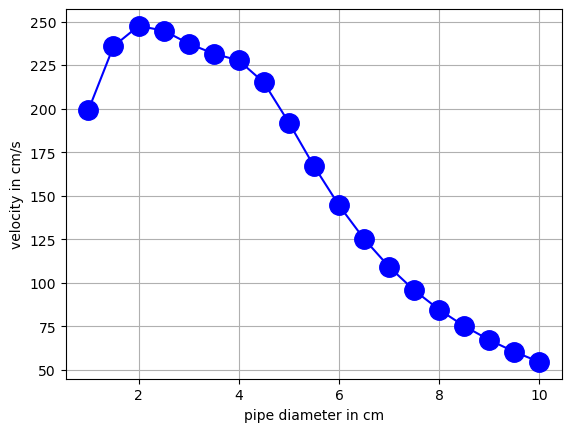

In [29]:
import numpy as np
import matplotlib.pyplot as plt

#Data
tol=1e-7
xold=200
Nz=19
Dpspan=np.linspace(1,10,Nz)
rho=1
myu=0.01
z2=800
z1=300
Le=2e4
g=981
eps=1e-2

#Subroutine
def myfun(v,Dp):
    Q=np.pi/4*Dp**2*v
    Hm=3718.5-2.3496*Q+7.8474e-4*Q**2-9.5812e-8*Q**3
    Re=rho*v*Dp/myu
    f=0.0596/(Re**0.215)
    F=z2-z1+f*Le*v**2/(2*g*Dp)-Hm
    return F

#Subroutine 2
def Secant(vguess,Dp):
    err=1
    xold=vguess
    while err>tol:
        Fplus=myfun(xold+eps,Dp)
        Fminus=myfun(xold-eps,Dp)
        dFx=(Fplus-Fminus)/(2*eps)
        Fx=myfun(xold,Dp)
        xnew=xold-Fx/dFx
        residual=(xold-xnew)/xnew
        err=np.abs(residual)
        xold=xnew
    return xnew

#main program
vout=np.zeros(len(Dpspan))
yout=np.zeros(len(Dpspan))
print('='*40)
print('|    Dp   |  velocity |     F(x)     |')
print('-'*40)
for i in range(0,len(Dpspan)):
    Dpnow=Dpspan[i]
    vout[i]=Secant(xold,Dpnow)
    yout[i]=myfun(vout[i],Dpnow)
    print('|Dp=%6.2f|vout=%6.2f|F(x)=%9.2e|'%(Dpnow,vout[i],yout[i]))
print('='*40)

plt.plot(Dpspan,vout,'-bo',markersize=14)
plt.grid()
plt.ylabel('velocity in cm/s')
plt.xlabel('pipe diameter in cm')